## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
fullData_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
# Display the data table for preview
fullData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
miceNumber = fullData_df['Mouse ID'].count()
miceNumber

1893

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = fullData_df[fullData_df.duplicated(['Mouse ID','Timepoint'])]
duplicateMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 



In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedMice_df = fullData_df.drop_duplicates('Mouse ID')
cleanedMice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [16]:
# Checking the number of mice in the clean DataFrame.
cleanMice_number = cleanedMice_df['Mouse ID'].count()
cleanMice_number

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
miceMean = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
miceMedian = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
miceVar = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
miceStd = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
miceSem = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
summaryMice_df = pd.DataFrame({'Mean':miceMean, 'Median':miceMedian, 'Variance':miceVar, 
                                   'Std. Deviation':miceStd, 'SEM':miceSem})
summaryMice_df


,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

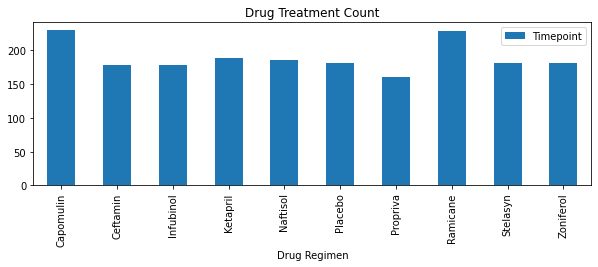

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
miceTime = pd.DataFrame(fullData_df.groupby(['Drug Regimen']).count()).reset_index()

# Change DateFrame to 2 Columns
drugsData_df = miceTime[['Drug Regimen', 'Timepoint']]
drugsData_df = drugsData_df.set_index('Drug Regimen')

drugsData_df.plot(kind='bar',figsize=(10,3))

plt.title('Number of Timepoints for Mice per Drug Regimen')
plt.show()
plt.tight_layout()

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

Text(0, 0.5, 'Timepoints')

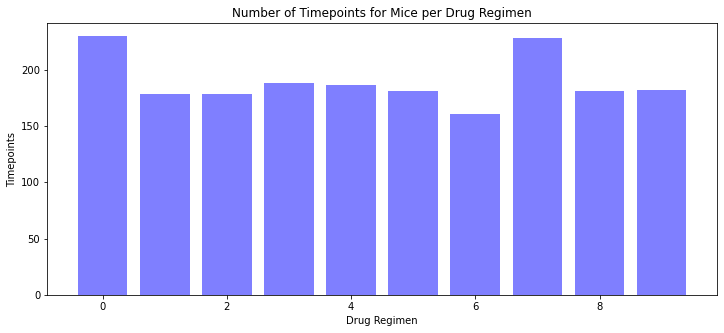

In [38]:
# Collect List of Drug Regimen
miceDrug_list = summaryMice_df.index.tolist()
# Create array based on Drug Regimen
drugCount = (fullData_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
# Create Chart
x_axis = np.arange(len(drugCount))
plt.figure(figsize=(12,5))
plt.bar(x_axis,drugCount,color='blue',alpha=.5,align='center')

plt.title('Number of Timepoints for Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by Gender
miceGender_gb = fullData_df.groupby(['Mouse ID','Sex'])
miceGender_df = pd.DataFrame(miceGender_gb.size())

# Create DataFrame with Gender Totals
miceGender = pd.DataFrame(miceGender_df.groupby(['Sex']).count())
miceGender.columns = ['Total Mice']

# Calculate
miceGender['Mice Percentage'] = (100)


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
